## Chapter 1.10 Modifying kriging parameters

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid

#%matplotlib widget


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [173]:
gp.save_model(geo_model, 'Tutorial2-1')

Directory already exists, files will be overwritten


True

In [3]:
if False:
    geo_model = gp.load_model('Tutorial2-1')
else:
    geo_model = gp.create_model('Tutorial2-1')
    gp.init_data(geo_model, [0, 1000, 0, 1000, -1000, 0], [50, 50, 50])
    geo_model.set_default_surfaces()
#     geo_model.set_default_orientation()
#     geo_model.add_surface_points(400, 300, -500, 'surface1')
#     geo_model.add_surface_points(600, 300, -500, 'surface1')


In [4]:
gp.set_interpolation_data(geo_model, theano_optimizer='fast_compile',  verbose=[])

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [5]:
geo_model.additional_data

values
Structure isLith                                  True
          isFault                                False
          number faults                              0
          number surfaces                            0
          number series                              1
          number surfaces per series                []
          len surfaces surface_points               []
          len series surface_points                [0]
          len series orientations                   []
Options   dtype                                float64
          output                               geology
          theano_optimizer                fast_compile
          device                                   cpu
          verbosity                                 []
Kriging   range                                1732.05
          $C_o$                                71428.6
          drift equations                          [0]
          nugget grad                             0.01
          nugget scalar                          1e-06
Rescaling rescaling factor                         NaN
          centers                      [nan, nan, nan]

In [6]:
vtk_object = gp.plot.plot_3D(geo_model)

holding... Use vtk.resume to go back to the interactive window


In [7]:
vtk_object.set_real_time_on()

In [ ]:
geo_model.additional_data

In [18]:
geo_model.modify_kriging_parameters('range', 50)

In [19]:
geo_model.interpolator.theano_graph.a_T.get_value()

array(0.125)

In [160]:
vtk_object.update_model()

In [159]:
vtk_object.resume()

holding... Use vtk.resume to go back to the interactive window


In [9]:
gp.activate_interactive_df(geo_model, vtk_object)

['surface1'] 1
Model not computed. Laking data in some surface
Model not computed. Laking data in some surface


In [101]:
geo_model.qi.get('surface_points')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

1
0
0
0
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
1
1
['surface1'] 1
['surface1'] 1
3
2
2
2
2
1
1
3


In [130]:
geo_model.qi.get('orientations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

0
0
0
0
0


In [171]:
geo_model.modify_kriging_parameters('range', 5000)
geo_model.modify_kriging_parameters('drift equations', np.array([0]))
geo_model.interpolator.set_initial_results()
geo_model.rescaling.set_rescaled_orientations()
vtk_object.update_model()

In [118]:
geo_model.interpolator.theano_graph.a_T.get_value()

array(1.25)

In [119]:
geo_model.interpolator.theano_graph.c_o_T.get_value()

array(89.28571429)

In [144]:
gp.compute_model(geo_model, debug=False,compute_mesh=True, sort_surfaces=False)



Lithology ids 
  [1.5 1.5 1.5 ... 1.5 1.5 1.5] 

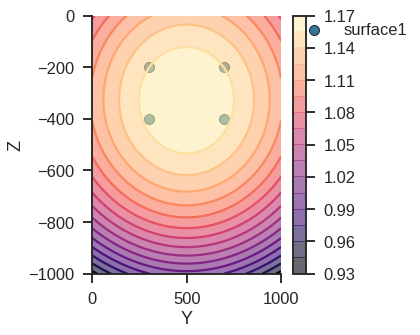

In [172]:
gp.plot.plot_scalar_field(geo_model, 25, direction='x', series=0)
plt.colorbar()

In [42]:
geo_model.additional_data.kriging_data

,values
range,1e-06
$C_o$,71428.6
drift equations,[3]
nugget grad,0.01
nugget scalar,1e-06


../../gempy/plot/visualization_2d.py:287: FutureWarning: Passing the block directly will get deprecated in the next version. Please use Solutionand block_type instead
  'and block_type instead', FutureWarning)


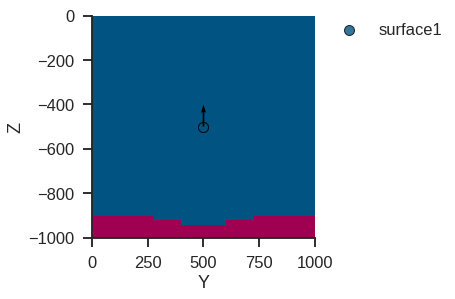

In [56]:
gp.plot.plot_section(geo_model, cell_number=25, block_type=geo_model.solutions.lith_block,
                         direction='x', plot_data=True)
